# Task 2 - Predicting Housing Prices

### Submitted by - Shivank Udayawal

## Problem Statement :

* Analysis and Prediction of House Sales in King County, USA
* Compare Prices of Houses with Waterfront and Without Waterfront and the views of the House with Waterfront and Without Waterfront. 
* Built a Regression Model which fits the best with the data and predicted the prices. 

## Introduction :

* King County is a county located in the U.S. state of Washington. The population was 2,149,970 in a 2016 census estimate. King is the most populous county in Washington, and the 13th-most populous in the United States. The county seat is Seattle, which is the state’s largest city. 
* King County is one of three Washington counties that are included in the Seattle-Tacoma-Bellevue metropolitan statistical area. About two-thirds of King County’s population lives in the city’s suburbs. 
* As of 2011, King County was the 86th highest-income county in the United States.

## About Dataset :

 1. id: a notation for a house
 2. date: Date house was sold
 3. price: Price is prediction target
 4. bedrooms: Number of Bedrooms/House
 5. bathrooms: Number of bathrooms/bedrooms
 6. sqft_living: square footage of the home
 7. sqft_lot: square footage of the lot
 8. floors: Total floors (levels) in house
 9. waterfront: House which has a view to a waterfront
 10. view: Has been viewed
 11. condition: How good the condition is Overall
 12. grade: overall grade given to the housing unit, based on King County grading system
 13. sqft_above: square footage of house apart from basement
 14. sqft_basement: square footage of the basement
 15. yr_built: Built Year
 16. yr_renovated: Year when house was renovated
 17. zipcode: zip code
 18. lat: Latitude coordinate
 19. long: Longitude coordinate
 20. sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
 21. sqft_lot15: lotSize area in 2015(implies-- some renovations)

## Hypothesis Generation :

#### Hypothesis - A: The average price of houses with a waterfront are higher than the price of houses without a waterfront

#### Hypothesis - B: The average no. of views with a waterfront are higher than the no. of views without a waterfront

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import folium
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

## Reading the Data

In [2]:
Data = pd.read_csv("kc_house_data.csv")

In [3]:
Data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
Data.shape

(21613, 21)

## Summary of Data

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## Total Unique Value

In [7]:
Data.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

## Total Missing Values

In [8]:
Data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Exploratory Data Analysis

### Data Visualization

<AxesSubplot:>

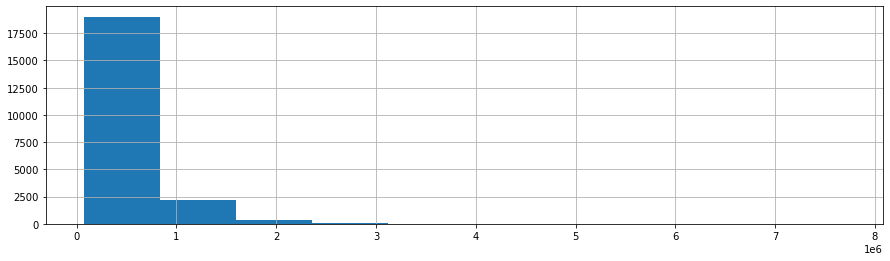

In [9]:
plt.figure(figsize = (15,4))
Data['price'].hist()

Text(0, 0.5, 'Density')

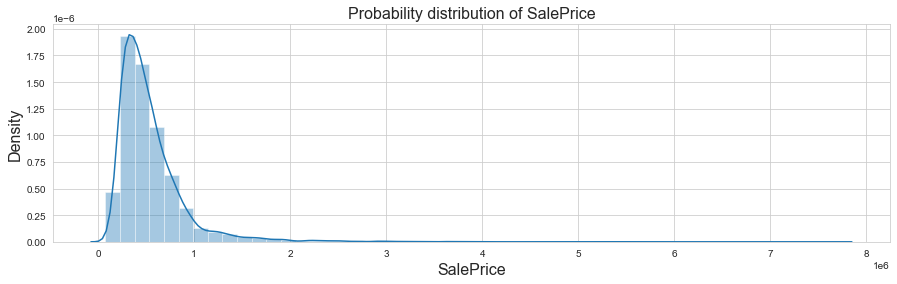

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,4))
sns.distplot(Data['price'])
plt.title("Probability distribution of SalePrice", fontsize=16)
plt.xlabel("SalePrice", fontsize=16)
plt.ylabel("Density", fontsize=16)

<AxesSubplot:xlabel='price'>

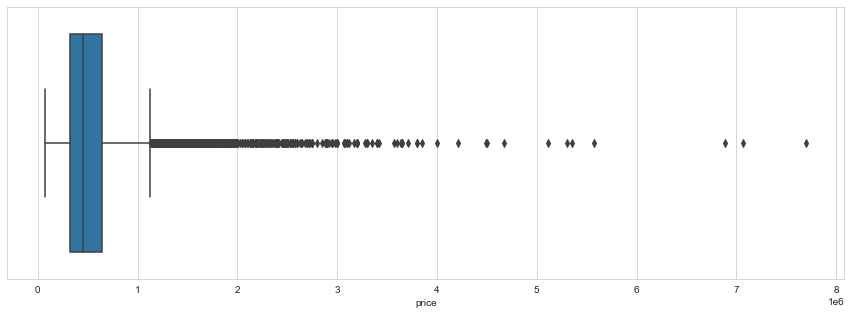

In [11]:
plt.figure(figsize = (15,5))
sns.boxplot(Data['price'])

## Multicollinearity 

### Correlation Matrix

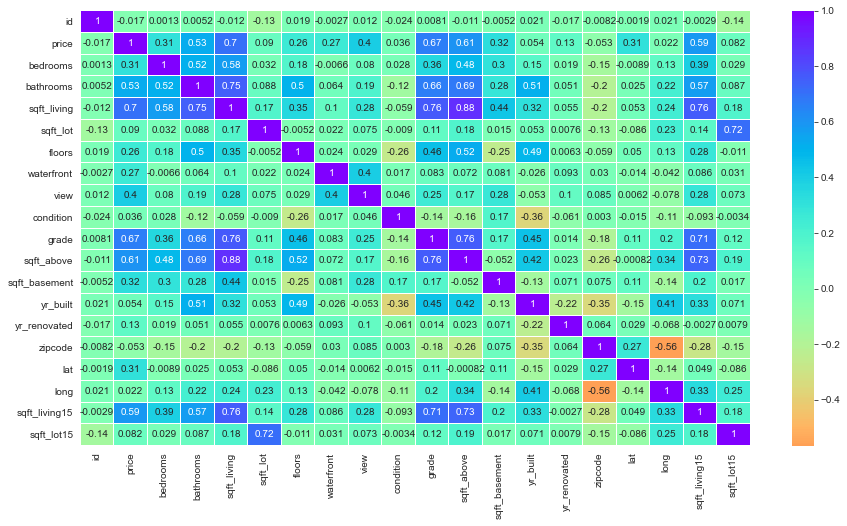

In [12]:
plt.figure(figsize = (15,8))
sns.heatmap(Data.corr(), center = 0, annot = True, linewidths = .1, cmap = 'rainbow_r')
plt.autoscale()

* Correlation of 0.75 or higher is considered to be a high correlation between independent variables.
* Variables with a correlation above 0.75:
  1. sqft_living and bathrooms
  2. sqft_living and grade
  3. sqft_living and sqft_above
  4. sqft_living and sqft_living15

## Pairplot

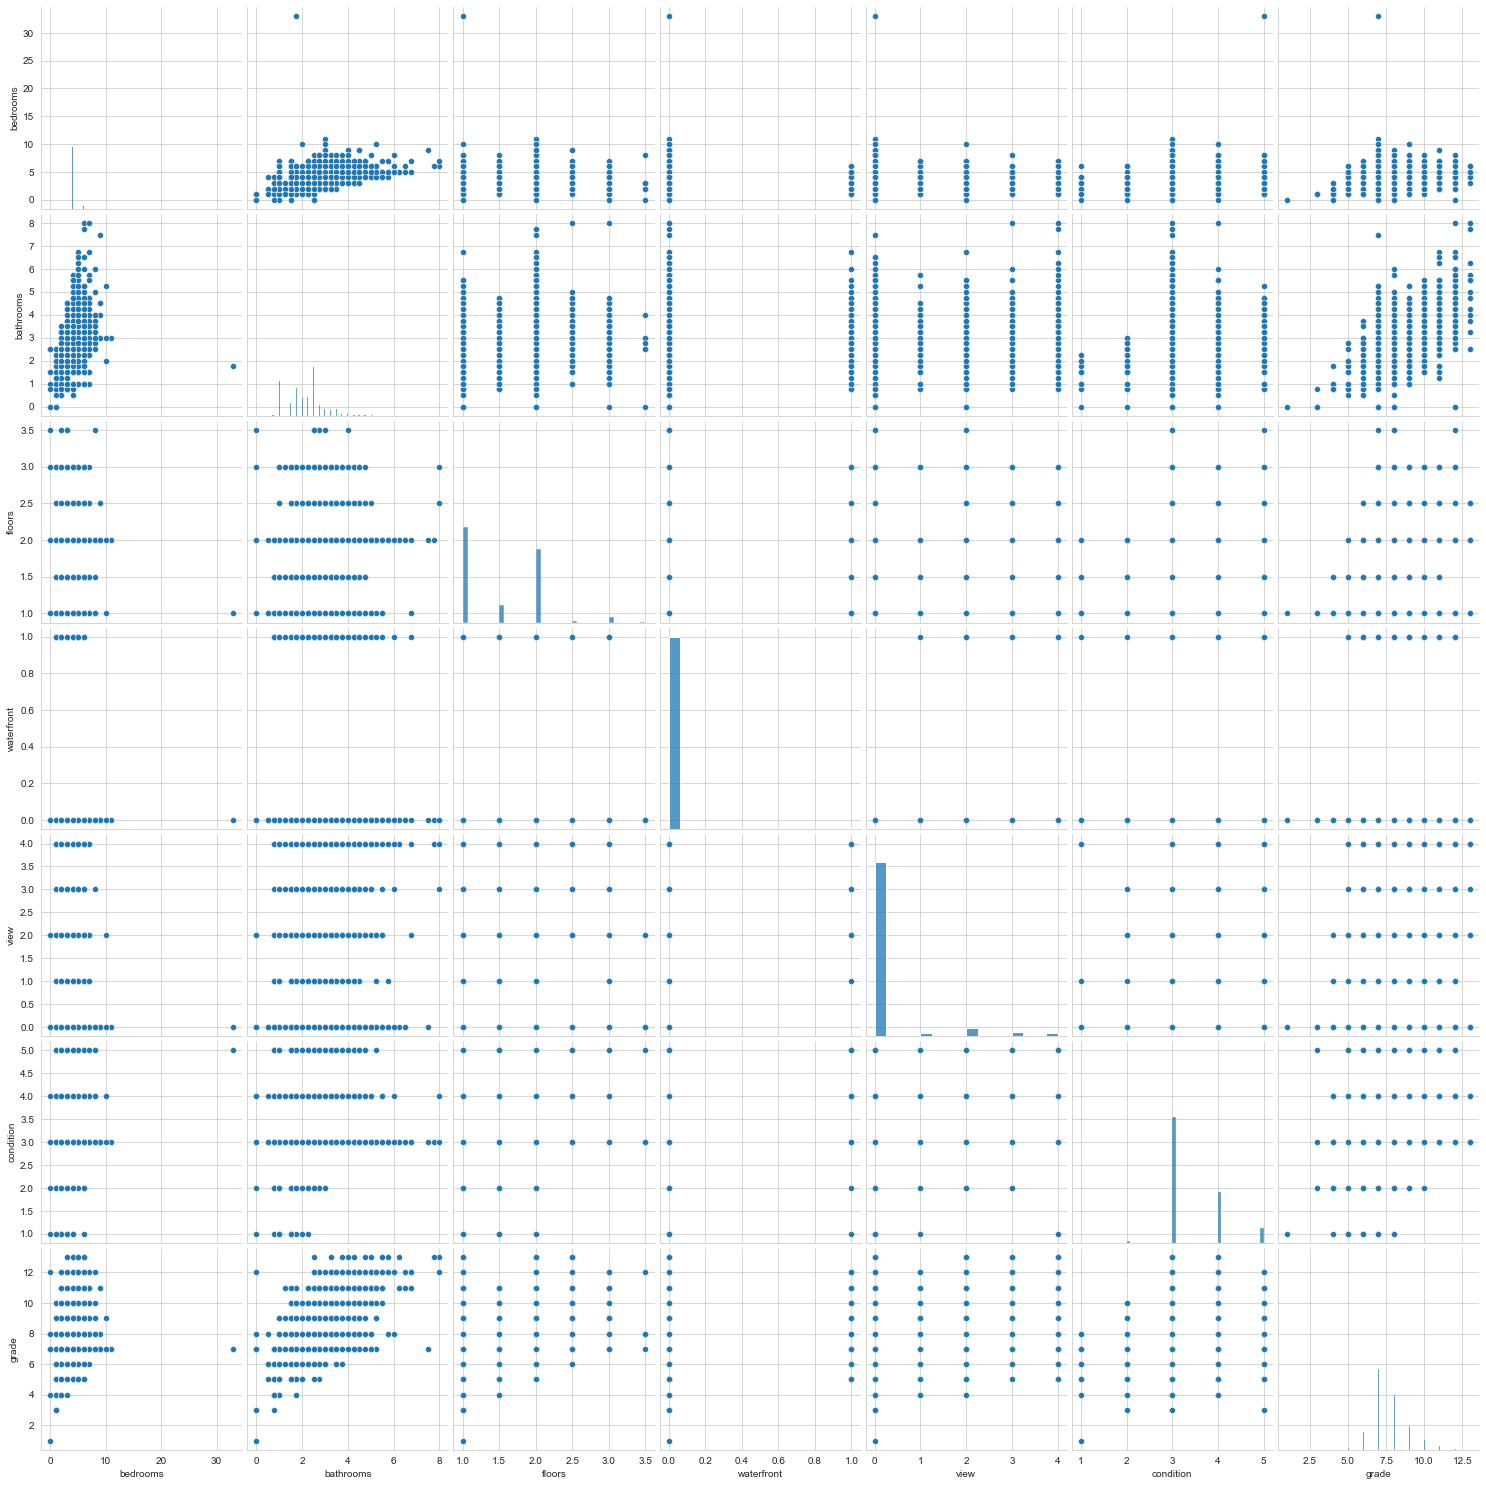

In [13]:
imp_feats = ['bedrooms', 'bathrooms', 'floors','waterfront','view','condition','grade']
sns.pairplot(Data[imp_feats], size = 3.0)
plt.show()

### Univariate Analysis

Text(0.5, 0, 'Bedrooms')

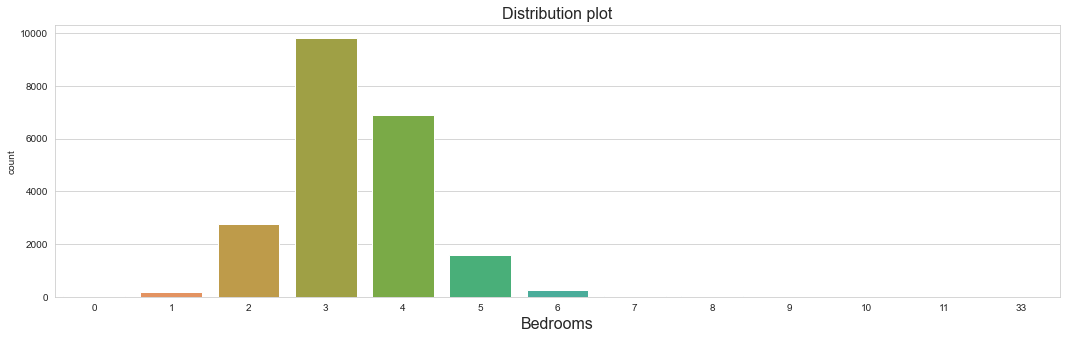

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize = (18,5))
sns.countplot(x = 'bedrooms', data = Data)
plt.title('Distribution plot', fontsize = 16)
plt.xlabel('Bedrooms', fontsize = 16)

In [15]:
Data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

Text(0.5, 0, 'Bathrooms')

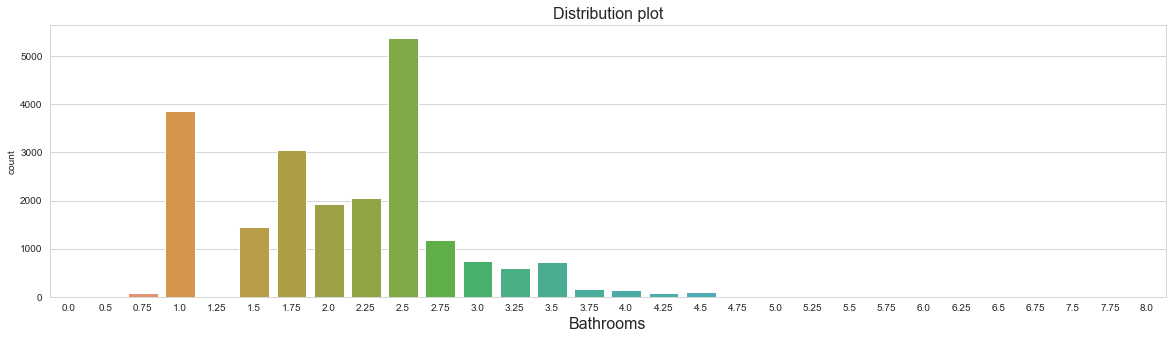

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize = (20,5))
sns.countplot(x = 'bathrooms', data = Data)
plt.title('Distribution plot', fontsize = 16)
plt.xlabel('Bathrooms', fontsize = 16)

In [17]:
Data['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64

Text(0.5, 0, 'Floors')

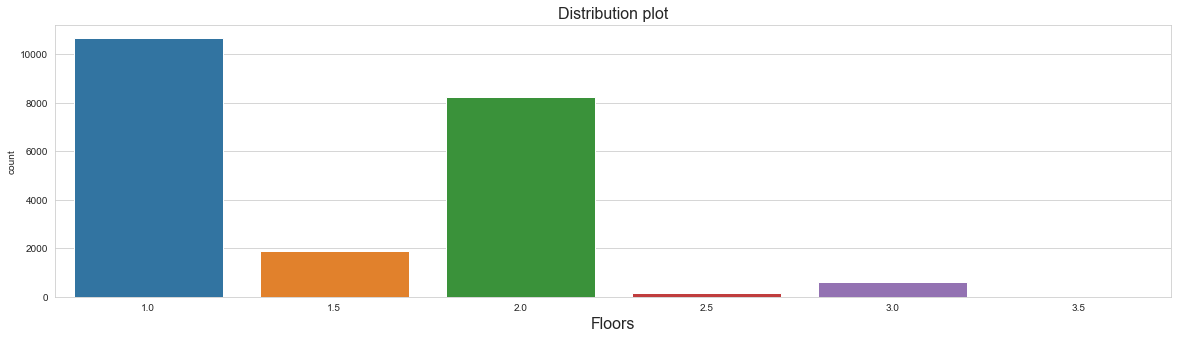

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize = (20,5))
sns.countplot(x = 'floors', data = Data)
plt.title('Distribution plot', fontsize = 16)
plt.xlabel('Floors', fontsize = 16)

In [19]:
Data['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

Text(0.5, 0, 'WaterFront View')

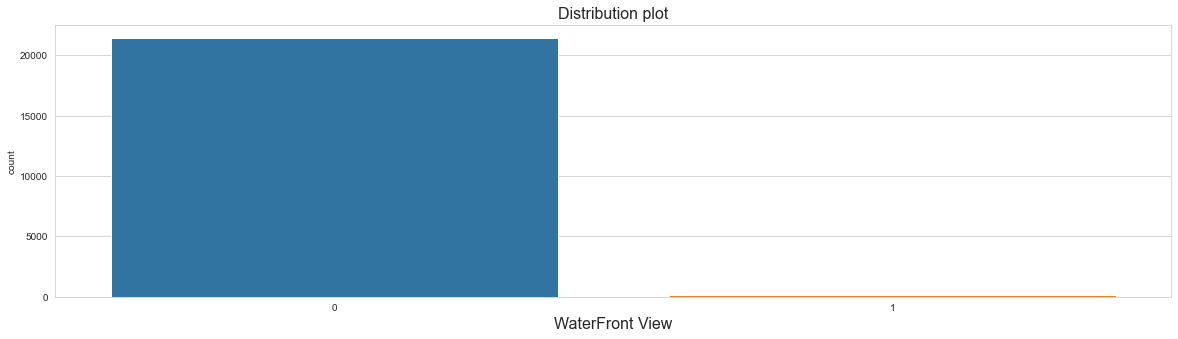

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize = (20,5))
sns.countplot(x = 'waterfront', data = Data)
plt.title('Distribution plot', fontsize = 16)
plt.xlabel('WaterFront View', fontsize = 16)

In [21]:
Data['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

Text(0.5, 0, 'View')

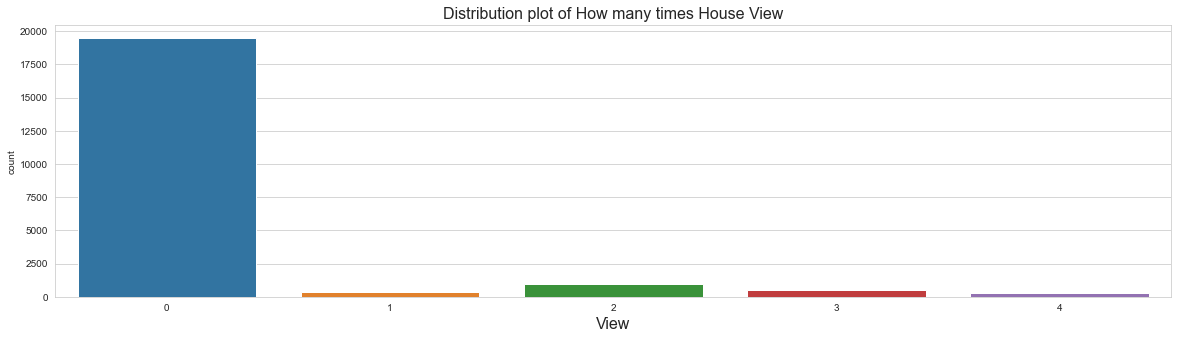

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize = (20,5))
sns.countplot(x = 'view', data = Data)
plt.title('Distribution plot of How many times House View', fontsize = 16)
plt.xlabel('View', fontsize = 16)

In [23]:
Data['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

Text(0.5, 0, 'condition')

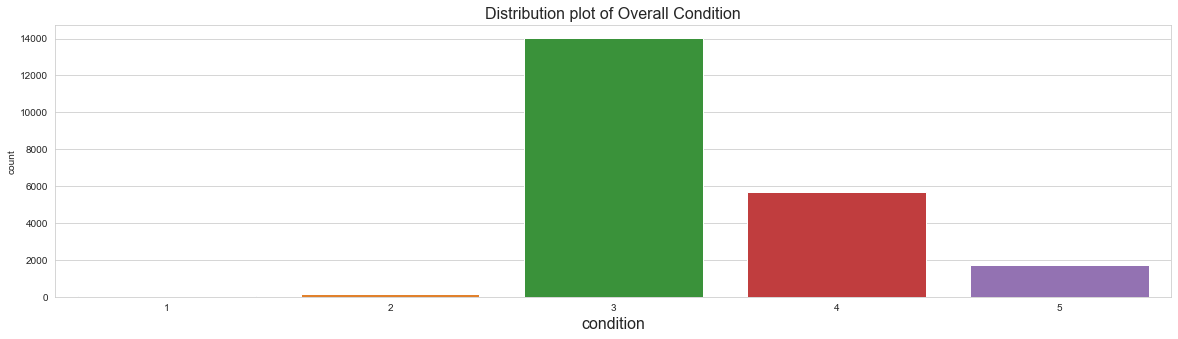

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize = (20,5))
sns.countplot(x = 'condition', data = Data)
plt.title('Distribution plot of Overall Condition', fontsize = 16)
plt.xlabel('condition', fontsize = 16)

In [25]:
Data['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

Text(0.5, 0, 'grade')

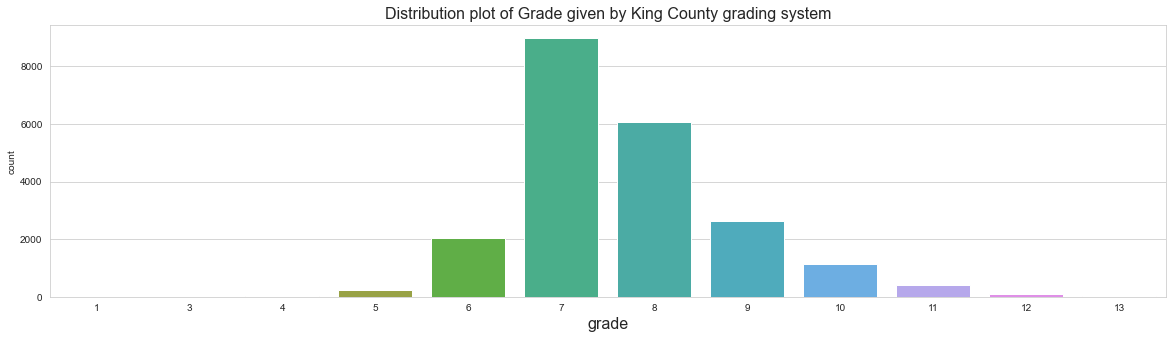

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize = (20,5))
sns.countplot(x = 'grade', data = Data)
plt.title('Distribution plot of Grade given by King County grading system', fontsize = 16)
plt.xlabel('grade', fontsize = 16)

In [27]:
Data['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

Text(0.5, 0, 'yr_built')

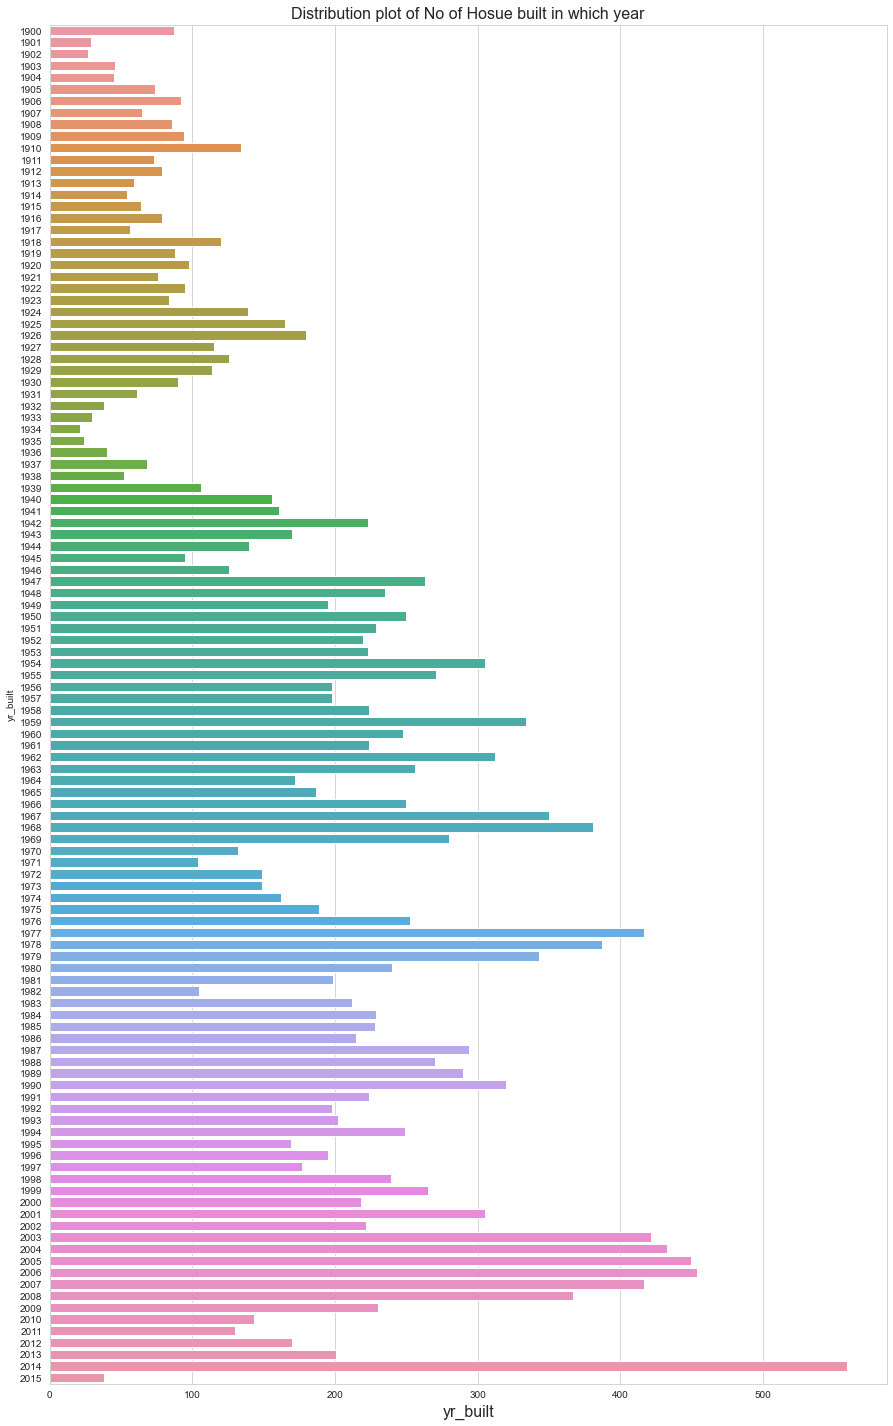

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,25))
sns.countplot(y = 'yr_built', data = Data)
plt.title('Distribution plot of No of Hosue built in which year', fontsize = 16)
plt.xlabel('yr_built', fontsize = 16)

In [29]:
Data['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

Text(0.5, 0, 'sqft_living')

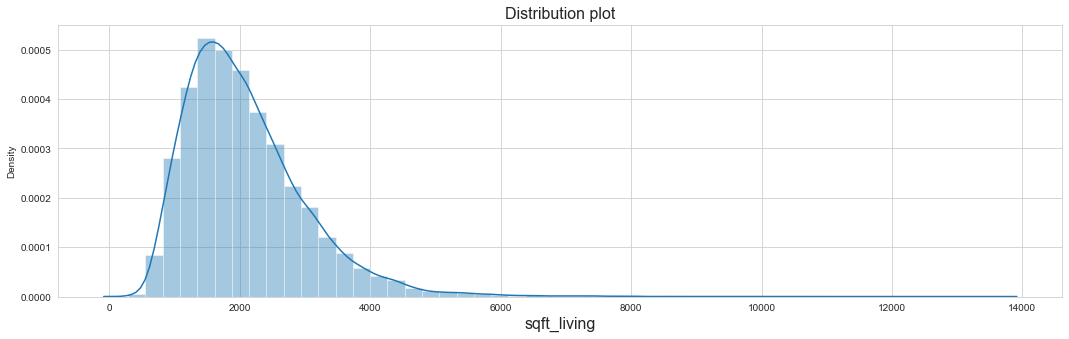

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize = (18,5))
sns.distplot(Data['sqft_living'])
plt.title('Distribution plot', fontsize = 16)
plt.xlabel('sqft_living', fontsize = 16)

Text(0.5, 0, 'sqft_lot')

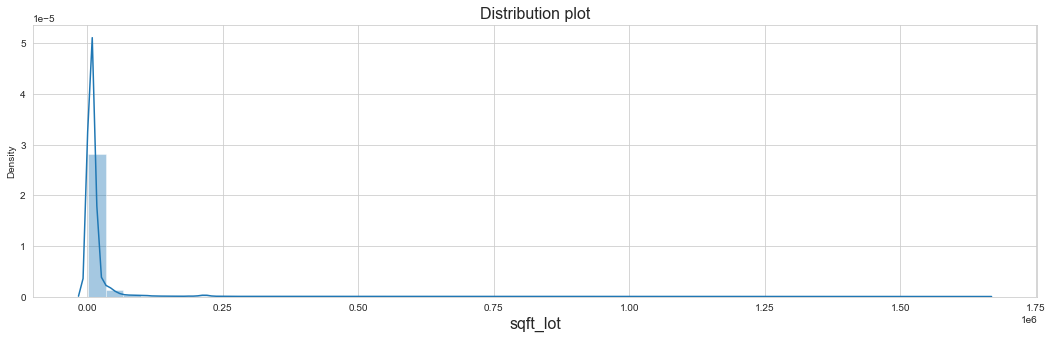

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize = (18,5))
sns.distplot(Data['sqft_lot'])
plt.title('Distribution plot', fontsize = 16)
plt.xlabel('sqft_lot', fontsize = 16)

Text(0.5, 0, 'sqft_above')

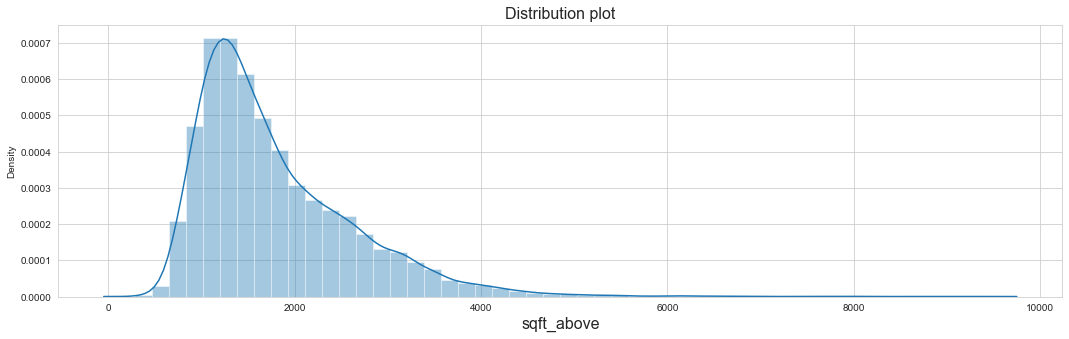

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize = (18,5))
sns.distplot(Data['sqft_above'])
plt.title('Distribution plot', fontsize = 16)
plt.xlabel('sqft_above', fontsize = 16)

Text(0.5, 0, 'sqft_basement')

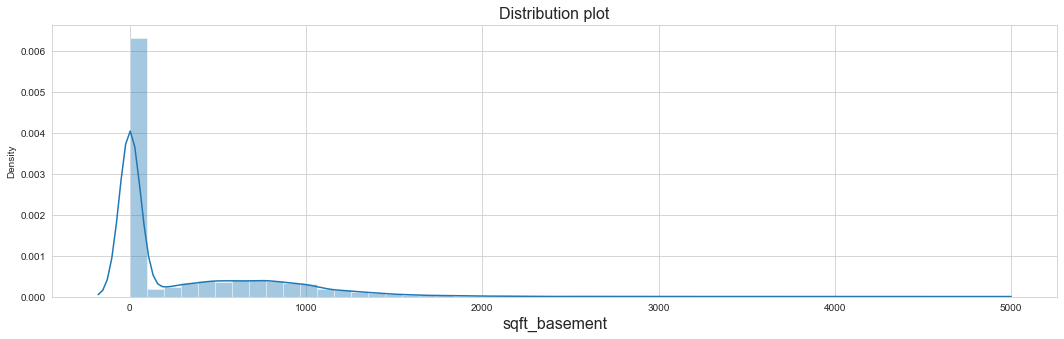

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize = (18,5))
sns.distplot(Data['sqft_basement'])
plt.title('Distribution plot', fontsize = 16)
plt.xlabel('sqft_basement', fontsize = 16)

Text(0.5, 0, 'sqft_living15')

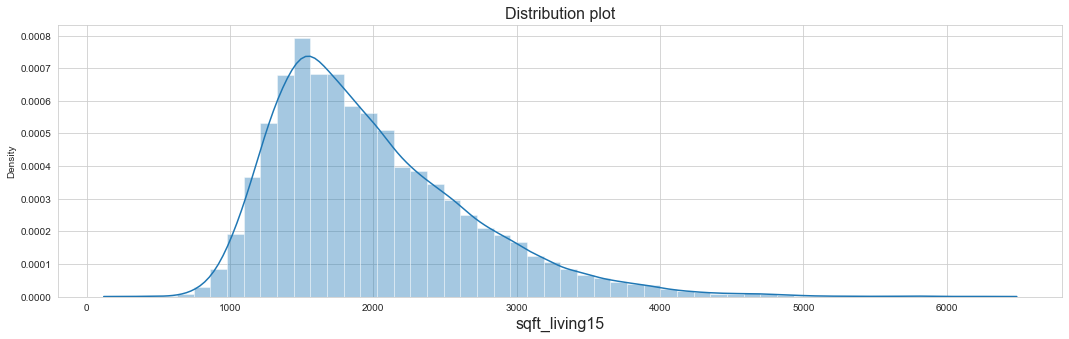

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize = (18,5))
sns.distplot(Data['sqft_living15'])
plt.title('Distribution plot', fontsize = 16)
plt.xlabel('sqft_living15', fontsize = 16)

Text(0.5, 0, 'sqft_lot15')

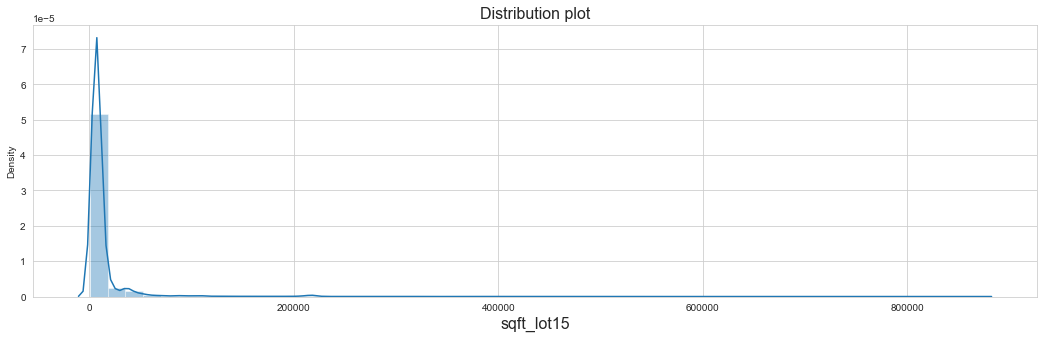

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize = (18,5))
sns.distplot(Data['sqft_lot15'])
plt.title('Distribution plot', fontsize = 16)
plt.xlabel('sqft_lot15', fontsize = 16)

### Bivariate Analysis

Text(0, 0.5, 'Price')

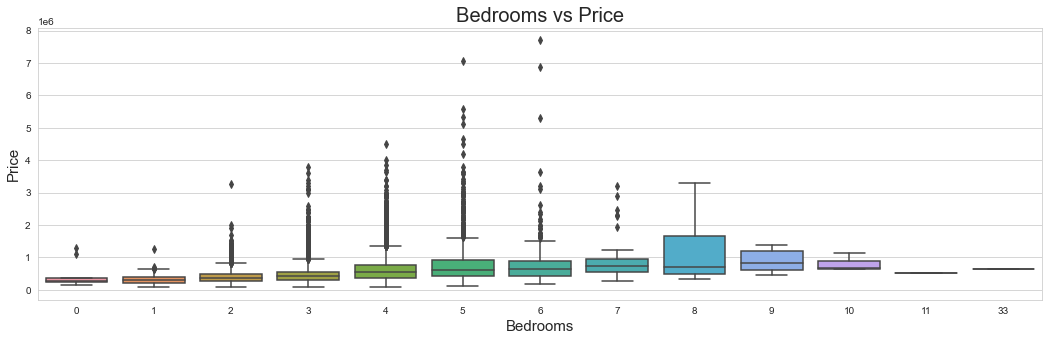

In [36]:
plt.figure(figsize = (18,5))
sns.boxplot(x = 'bedrooms', y = 'price', data = Data)
plt.title('Bedrooms vs Price', fontsize = 20)
plt.xlabel('Bedrooms', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

Text(0, 0.5, 'Price')

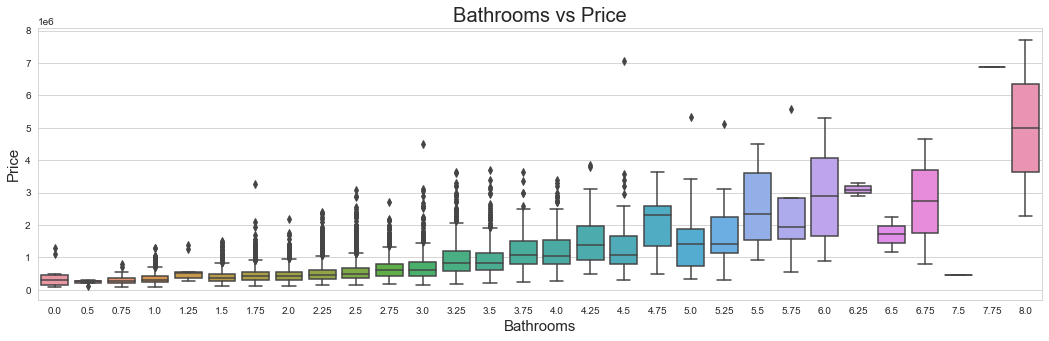

In [37]:
plt.figure(figsize = (18,5))
sns.boxplot(x = 'bathrooms', y = 'price', data = Data)
plt.title('Bathrooms vs Price', fontsize = 20)
plt.xlabel('Bathrooms', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

Text(0, 0.5, 'Price')

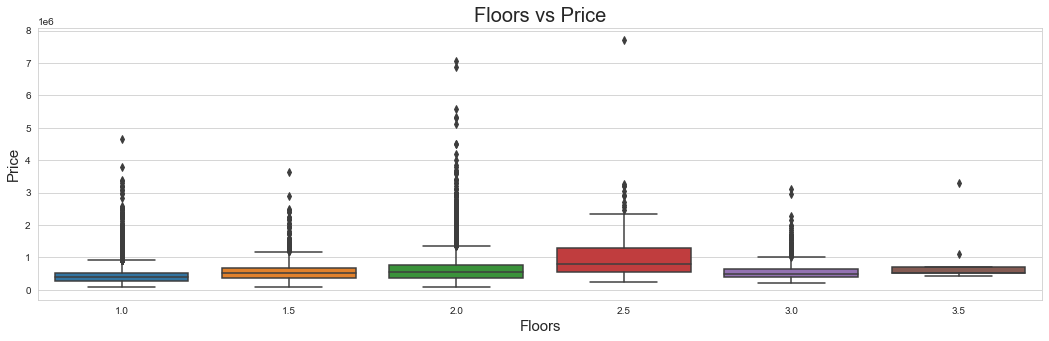

In [38]:
plt.figure(figsize = (18,5))
sns.boxplot(x = 'floors', y = 'price', data = Data)
plt.title('Floors vs Price', fontsize = 20)
plt.xlabel('Floors', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

Text(0, 0.5, 'Price')

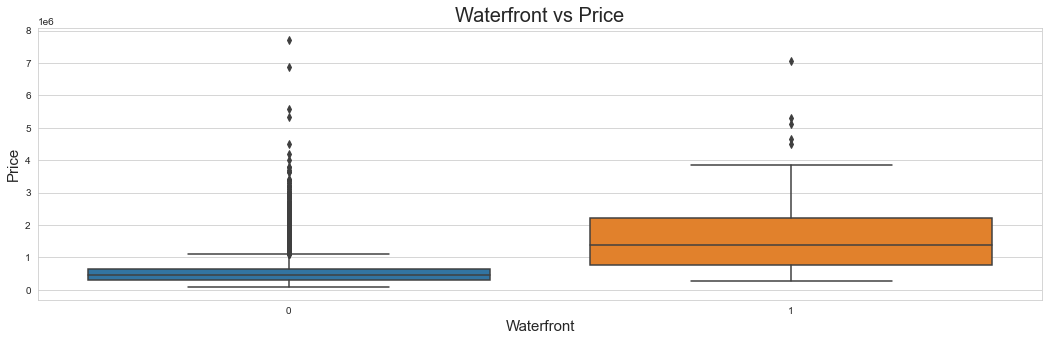

In [39]:
plt.figure(figsize = (18,5))
sns.boxplot(x = 'waterfront', y = 'price', data = Data)
plt.title('Waterfront vs Price', fontsize = 20)
plt.xlabel('Waterfront', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

Text(0, 0.5, 'Price')

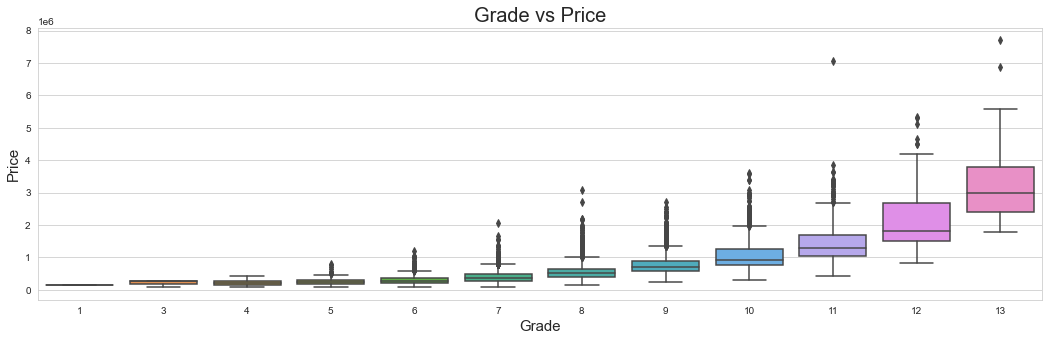

In [40]:
plt.figure(figsize = (18,5))
sns.boxplot(x = 'grade', y = 'price', data = Data)
plt.title('Grade vs Price', fontsize = 20)
plt.xlabel('Grade', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

### Renovation have a Noticeable Effect on Price?

In [41]:
Data['renovated'] = np.zeros(shape = Data.shape[0])

yrs = []
for i in Data.yr_renovated:
    if i != 0:
        yrs.append('Renovated')
    else:
        yrs.append('Not Renovated')
Data.renovated = yrs

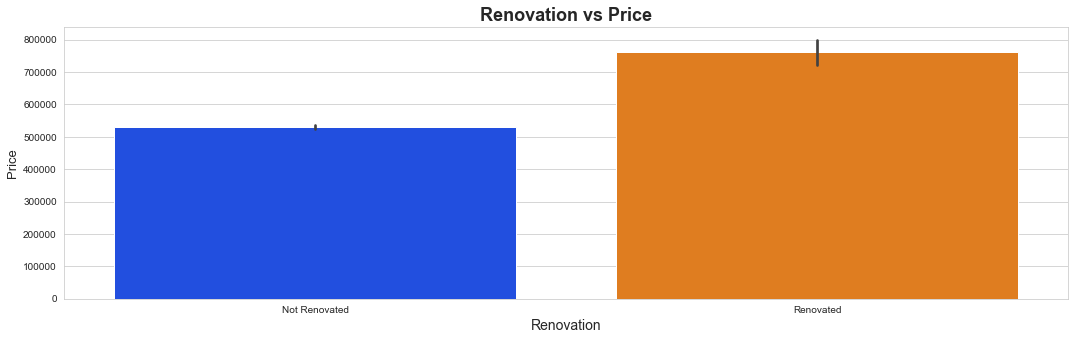

In [42]:
plt.figure(figsize = (18,5))
sns.barplot(x = "renovated", y = "price", data = Data, palette = 'bright')
plt.title('Renovation vs Price', fontweight = 'bold', fontsize = 18)
plt.xlabel('Renovation', fontsize = 14)
plt.ylabel('Price', fontsize = 13)
plt.show()

In [43]:
noren = Data.loc[(Data['renovated'] == 'Not Renovated')]
ren = Data.loc[(Data['renovated'] == 'Renovated')]

In [44]:
print('Mean price of house without renovation     :',np.round(noren['price'].mean()))
print('Median price of house without renovation   :',noren['price'].median())
print('Mean price of house with renovation        :',np.round(ren['price'].mean()))
print('Median price of house with renovation      :',ren['price'].median())
print("\n")
print("Renovating a house in King's County has a mean price increase of $", np.round(ren['price'].mean()-noren['price'].mean()),"or",np.round(ren['price'].mean()/noren['price'].mean()*100),"percent")

Mean price of house without renovation     : 530361.0
Median price of house without renovation   : 448000.0
Mean price of house with renovation        : 760379.0
Median price of house with renovation      : 600000.0


Renovating a house in King's County has a mean price increase of $ 230018.0 or 143.0 percent


* A 144% mean increase in house price is a noticeable effect.
* Therefore, Renovating a house in King County tends to have a significant effect on price.

### Is there a difference in price between a house built in a given time period versus a house renovated in that same time period?

In [45]:
bins1 = [1950., 1980., 1990., 2000., 2010.,2015.]
bins2 = [1950., 1980., 1990., 2000., 2010.,2015.]
periods1 = ['1950-1980','1980-1989','1990-1999','2000-2009','2010-2015']
periods2 = ['1950-1980','1980-1989','1990-1999','2000-2009','2010-2015']

Data['yr_built_per'] = pd.cut(Data['yr_built'], bins1, labels = periods1, right = False)
Data['yr_ren_per']   = pd.cut(Data['yr_renovated'], bins2, labels = periods2, right = False)

In [46]:
builtprice_1950 = Data[Data['yr_built_per'] == '1950-1980']['price'].mean()
builtprice_1980 = Data[Data['yr_built_per'] == '1980-1989']['price'].mean()
builtprice_1990 = Data[Data['yr_built_per'] == '1990-1999']['price'].mean()
builtprice_2000 = Data[Data['yr_built_per'] == '2000-2009']['price'].mean()
builtprice_2010 = Data[Data['yr_built_per'] == '2010-2015']['price'].mean()
builtpricemeans = [builtprice_1950, builtprice_1980, builtprice_1990, builtprice_2000, builtprice_2010]

renprice_1950 = Data[Data['yr_ren_per'] == '1950-1980']['price'].mean()
renprice_1980 = Data[Data['yr_ren_per'] == '1980-1989']['price'].mean()
renprice_1990 = Data[Data['yr_ren_per'] == '1990-1999']['price'].mean()
renprice_2000 = Data[Data['yr_ren_per'] == '2000-2009']['price'].mean()
renprice_2010 = Data[Data['yr_ren_per'] == '2010-2015']['price'].mean()
renpricemeans = [renprice_1950, renprice_1980, renprice_1990, renprice_2000, renprice_2010]

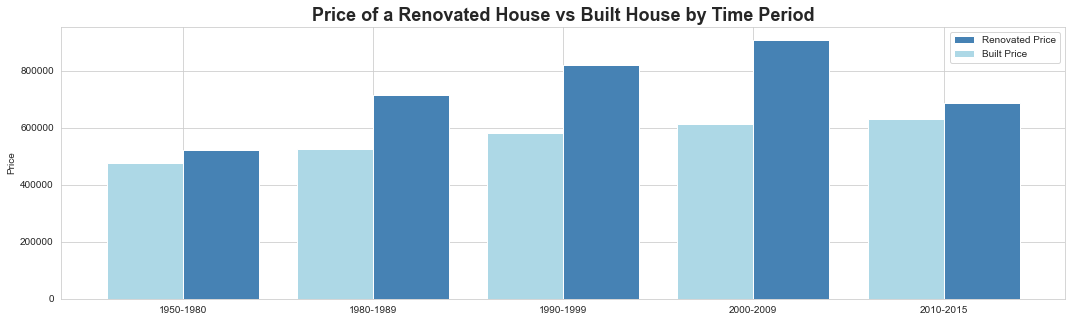

In [47]:
fig = plt.figure(figsize = (18,5))
ax = fig.add_subplot(111)
width = 0.4
ypos = np.arange(len(periods1))
rects1 = ax.bar(ypos+0.2, renpricemeans, width, color = 'steelblue')
rects2 = ax.bar(ypos-0.2, builtpricemeans, width, color ='lightblue')
ax.set_ylabel('Price')
ax.set_title('Price of a Renovated House vs Built House by Time Period', fontweight = 'bold', fontsize = 18)
plt.xticks(ypos,periods1)
ax.set_xticklabels( ('1950-1980','1980-1989','1990-1999','2000-2009','2010-2015') )
ax.legend( (rects1[0], rects2[0]), ('Renovated Price', 'Built Price') )
plt.show()

* There seems to be a signficantly larger Price to Houses that were Renovated in a time period compared to houses that were newly built in that same time period. 
* It looks as if the gap in price is growing more and more for each time period until 2010-2015. 
* This could be due to the fact that less time has passed compared to the other groupings of time.

### Difference in Price based on Geographical location in King's County?

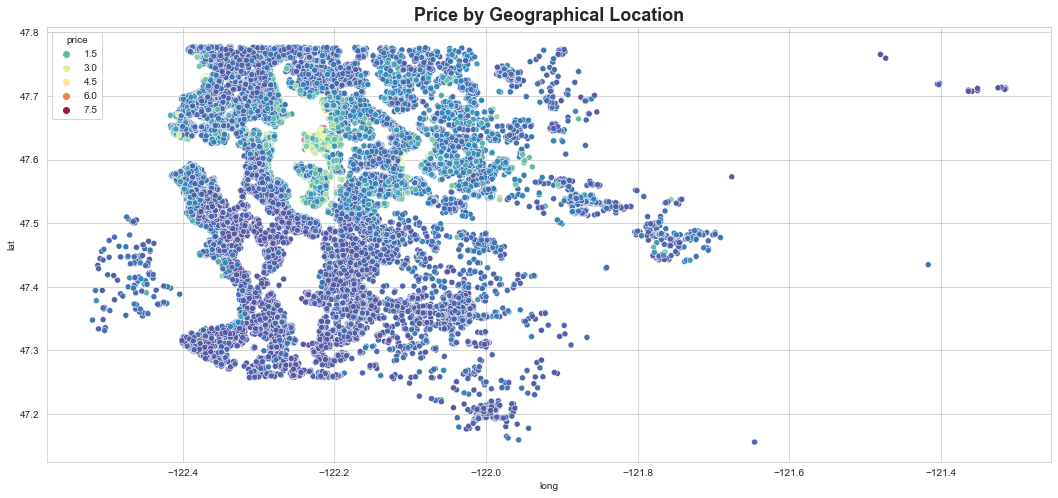

In [48]:
plt.figure(figsize = (18,8))
sns.scatterplot(Data['long'], Data['lat'], hue = Data['price'], palette = 'Spectral_r')
plt.title("Price by Geographical Location", fontweight = 'bold', fontsize = 18)
plt.show()

In [49]:
coord = Data[["long", "lat"]].values
regions = MiniBatchKMeans(n_clusters = 30, batch_size = 10000).fit(coord)
Data["pickup_cluster"] = regions.predict(Data[["long", "lat"]])

In [50]:
centerOfRegions = regions.cluster_centers_
noOfClusters = len(centerOfRegions)
m = folium.Map(location = [121.9836, 47.5480], zoom_start = 12, radius = 50, tiles = "Stamen Toner")

for i in range(noOfClusters):
    folium.Marker([centerOfRegions[i][0], centerOfRegions[i][1]], popup = (str(np.round(centerOfRegions[i][0], 2))+", "+str(np.round(centerOfRegions[i][1], 2)))).add_to(m)
m

* Plotting the latitudes and longitudes from the dataset have provided a heatmap of the area in terms of price. 
* With the map visualized, it looks like it would be interesting if the County was split into North and South at latitude 47.5.

In [51]:
Data['North'] = np.zeros(shape = Data.shape[0])
north = []
for i in Data.lat:
    if i > 47.5:
        north.append('North')
    else:
        north.append('South')
Data.North = north

In [52]:
south = Data.loc[(Data['North'] == 'South')]
north = Data.loc[(Data['North'] == 'North')]

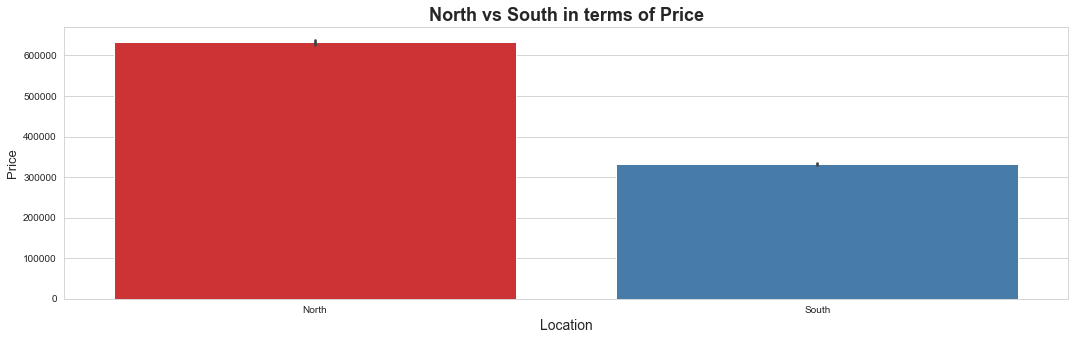

In [53]:
plt.figure(figsize = (18,5))
g = sns.barplot(x = "North", y = "price", data = Data, palette = 'Set1')
plt.title('North vs South in terms of Price', fontweight = 'bold', fontsize = 18)
plt.xlabel('Location',fontsize = 14)
plt.ylabel('Price', fontsize = 13)
plt.show()

In [54]:
print('Mean price of house in the Southern half of Seattle  :',np.round(south['price'].mean()))
print('Mean price of house in the Northern half of Seattle  :',np.round(north['price'].mean()))
print('Mean difference of',np.round(north['price'].mean()-south['price'].mean()),'dollars')
print('Mean ratio of',np.round(north['price'].mean()/south['price'].mean()*100),'percent')

Mean price of house in the Southern half of Seattle  : 331875.0
Mean price of house in the Northern half of Seattle  : 631823.0
Mean difference of 299948.0 dollars
Mean ratio of 190.0 percent


* The Houses in the Northern Half of Seattle are valued considerably Higher than the Southern Half.

## Regression

Text(0, 0.5, 'Price')

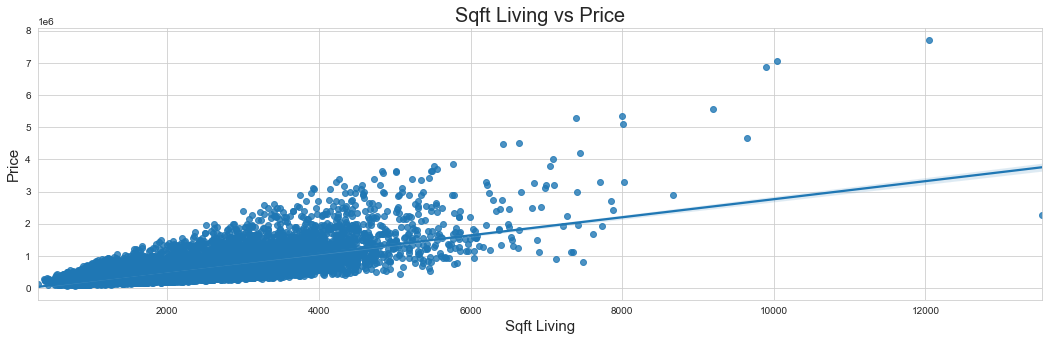

In [55]:
plt.figure(figsize = (18,5))
sns.regplot(x = 'sqft_living', y = 'price', data = Data)
plt.title('Sqft Living vs Price', fontsize = 20)
plt.xlabel('Sqft Living', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

Text(0, 0.5, 'Price')

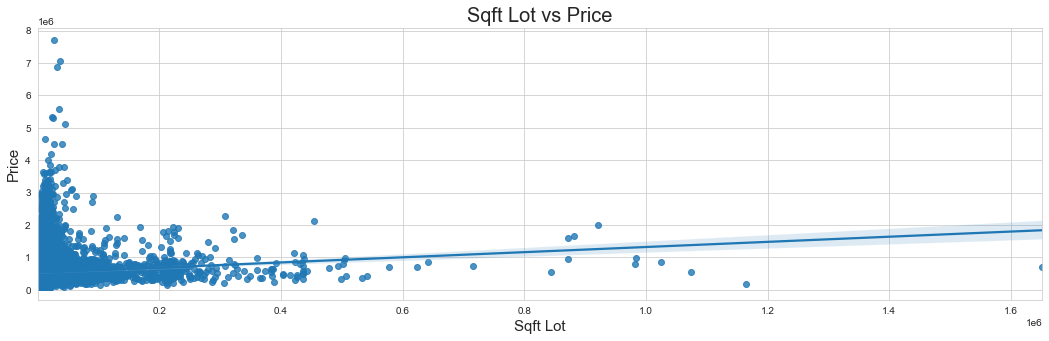

In [56]:
plt.figure(figsize = (18,5))
sns.regplot(x = 'sqft_lot', y = 'price', data = Data)
plt.title('Sqft Lot vs Price', fontsize = 20)
plt.xlabel('Sqft Lot', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

Text(0, 0.5, 'Price')

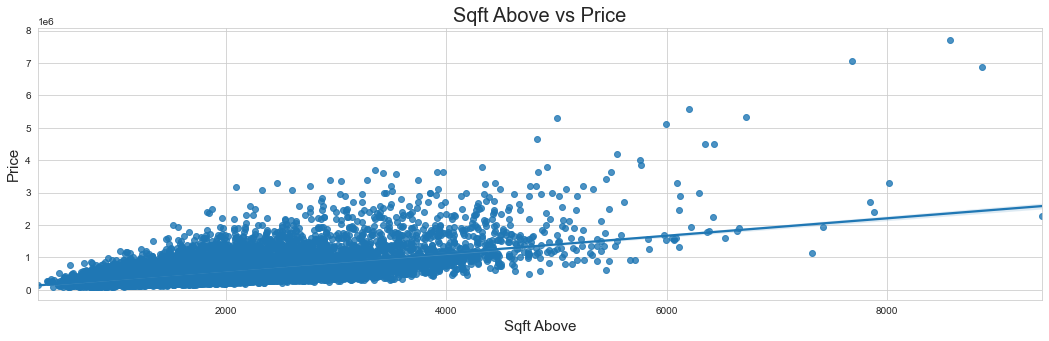

In [57]:
plt.figure(figsize = (18,5))
sns.regplot(x = 'sqft_above', y = 'price', data = Data)
plt.title('Sqft Above vs Price', fontsize = 20)
plt.xlabel('Sqft Above', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

Text(0, 0.5, 'Price')

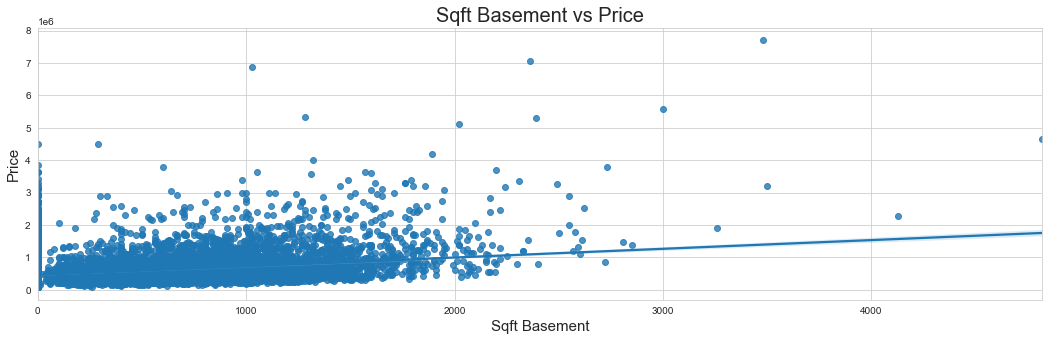

In [58]:
plt.figure(figsize = (18,5))
sns.regplot(x = 'sqft_basement', y = 'price', data = Data)
plt.title('Sqft Basement vs Price', fontsize = 20)
plt.xlabel('Sqft Basement', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

Text(0, 0.5, 'Price')

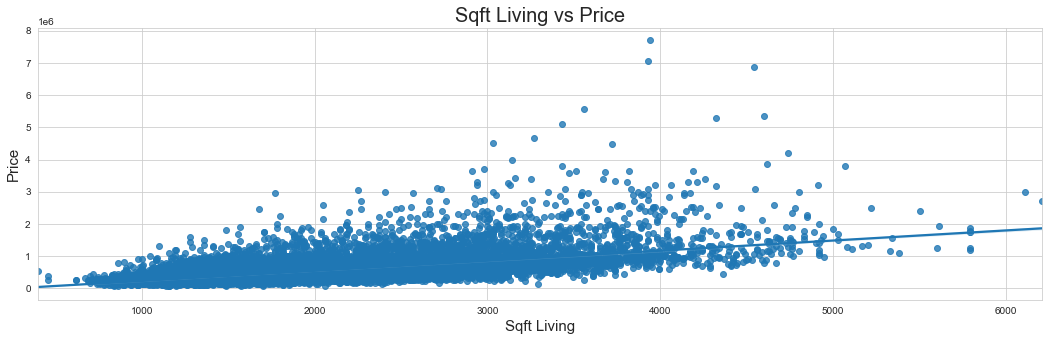

In [59]:
plt.figure(figsize = (18,5))
sns.regplot(x = 'sqft_living15', y = 'price', data = Data)
plt.title('Sqft Living vs Price', fontsize = 20)
plt.xlabel('Sqft Living', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

Text(0, 0.5, 'Price')

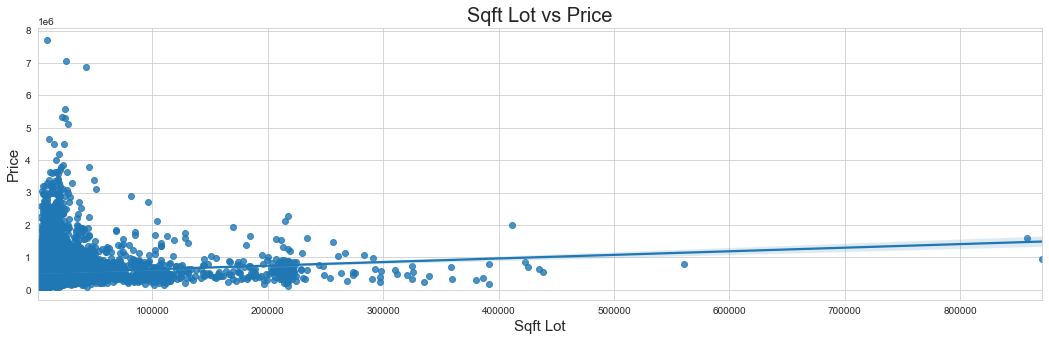

In [60]:
plt.figure(figsize = (18,5))
sns.regplot(x = 'sqft_lot15', y = 'price', data = Data)
plt.title('Sqft Lot vs Price', fontsize = 20)
plt.xlabel('Sqft Lot', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

## Test the Linearity Assumption

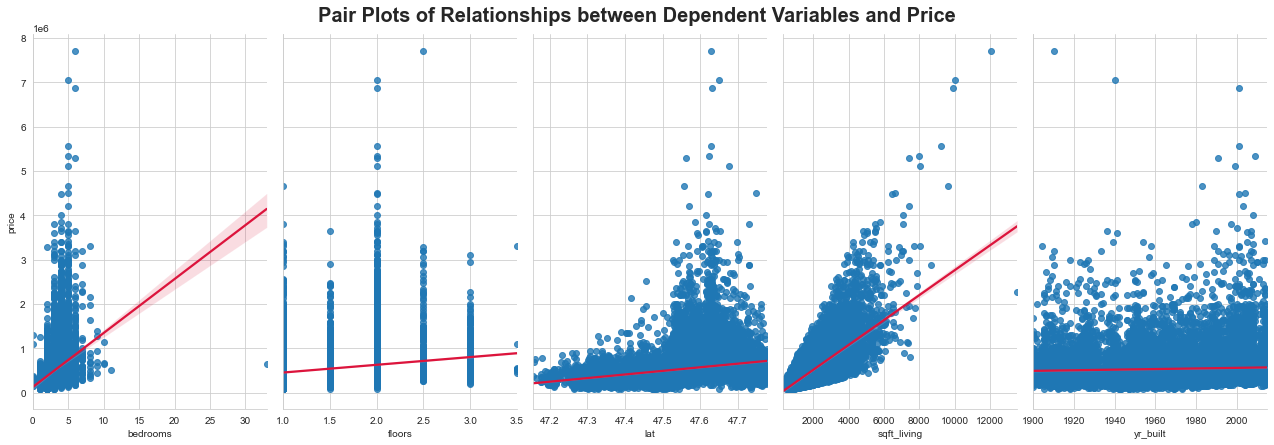

In [61]:
sns.pairplot(x_vars = ['bedrooms', 'floors', 'lat','sqft_living','yr_built'], y_vars = 'price', data = Data, kind = 'reg', 
             plot_kws = {'line_kws':{'color':'crimson'}}, height = 6, aspect = 0.6)
plt.suptitle('Pair Plots of Relationships between Dependent Variables and Price', size = 20, weight = 'bold', y = 1.02)
plt.show();

* There seem to be a rough linear relationships between price and the variables. Latitude, sqft_living and yr_built seem to have the better fitting linear relationships with price. 
* Bedrooms and floors do not seem to have a clear linear relationship with price. 
* Something that stands out in all of these pair plots, are outliers.

* Before proceeding to modeling, here is a refresher for the assumptions required for Linear Regression:

  1. LINEARITY       : The relationship between the independent and dependent variables needs to be linear
  2. NORMALITY       : The linear regression analysis requires all variables to be normal.
  3. MULTICOLINEARITY: There is little to no multicolinearity in the data.
  4. HOMOSCEDASTICITY: Residuals must be equal across the regression line.

### Removing the unnecessary columns

In [62]:
Data.drop(['id','date','renovated','yr_built_per','yr_ren_per','pickup_cluster','North','sqft_lot','sqft_lot15'], axis = 1, 
          inplace = True)

In [63]:
Data.shape

(21613, 17)

## PreProcessing Data

In [64]:
X = Data.drop(columns = ['price'])
Y = Data[['price']]

In [65]:
print(X.shape)
print(Y.shape)

(21613, 16)
(21613, 1)


## Modeling

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3 , random_state = 3)

## Linear Regression

In [67]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [68]:
intercept = print(model.intercept_)
intercept

[5479044.50833766]


In [69]:
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(model.coef_[0] , columns = ['coefficients'])], axis = 1)
coefficients

,0,coefficients
0,bedrooms,-32631.460017
1,bathrooms,39812.725291
2,sqft_living,107.220928
3,floors,11611.769077
4,waterfront,536698.574761
5,view,54590.374609
6,condition,26184.613189
7,grade,95442.077535
8,sqft_above,67.714328
9,sqft_basement,39.506600


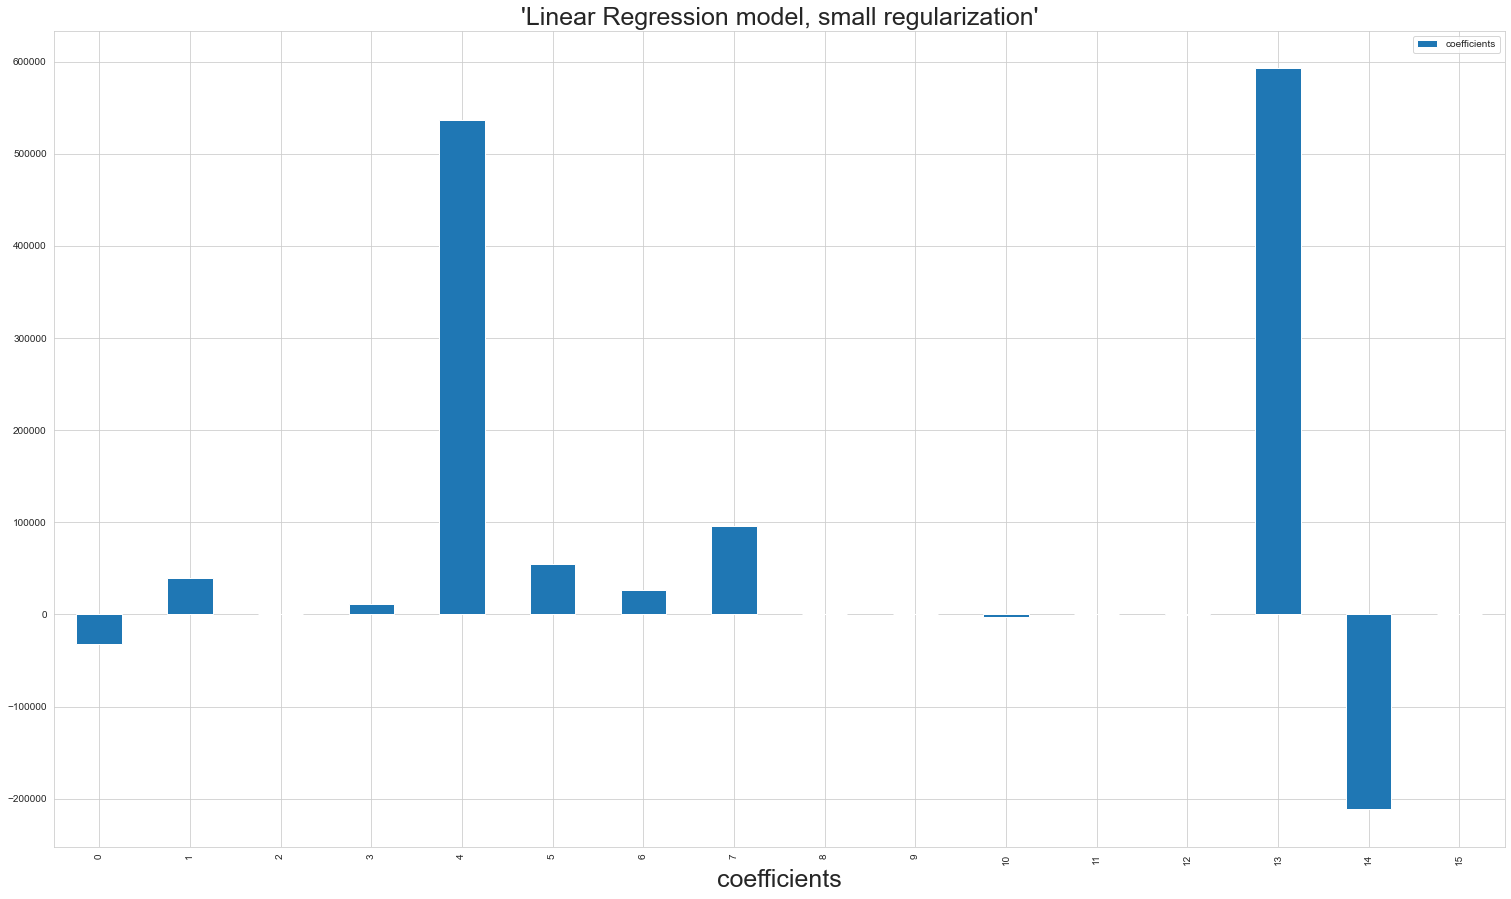

In [70]:
coefficients.sort_values('coefficients', ascending = False, inplace = True)
coefficients.plot(kind = 'bar', figsize = (26,15))
plt.xlabel("coefficients", size = '25')
plt.title("'Linear Regression model, small regularization'", size = '25')
plt.legend()

In [71]:
LR_pred = model.predict(x_test)
LR_pred

array([[ 538869.368574  ],
       [1299388.28993425],
       [ 763861.73052519],
       ...,
       [ 126456.9210405 ],
       [ 332127.97509327],
       [ 369205.05033392]])

In [72]:
LR_pred - y_test

,price
4131,13869.368574
17459,-570611.710066
2192,13861.730525
12418,-154448.935653
15773,-170268.284636
...,...
11035,48061.549746
18521,-143630.918312
1777,-142543.078959
4261,72127.975093


Text(0, 0.5, 'Deceased Per Day')

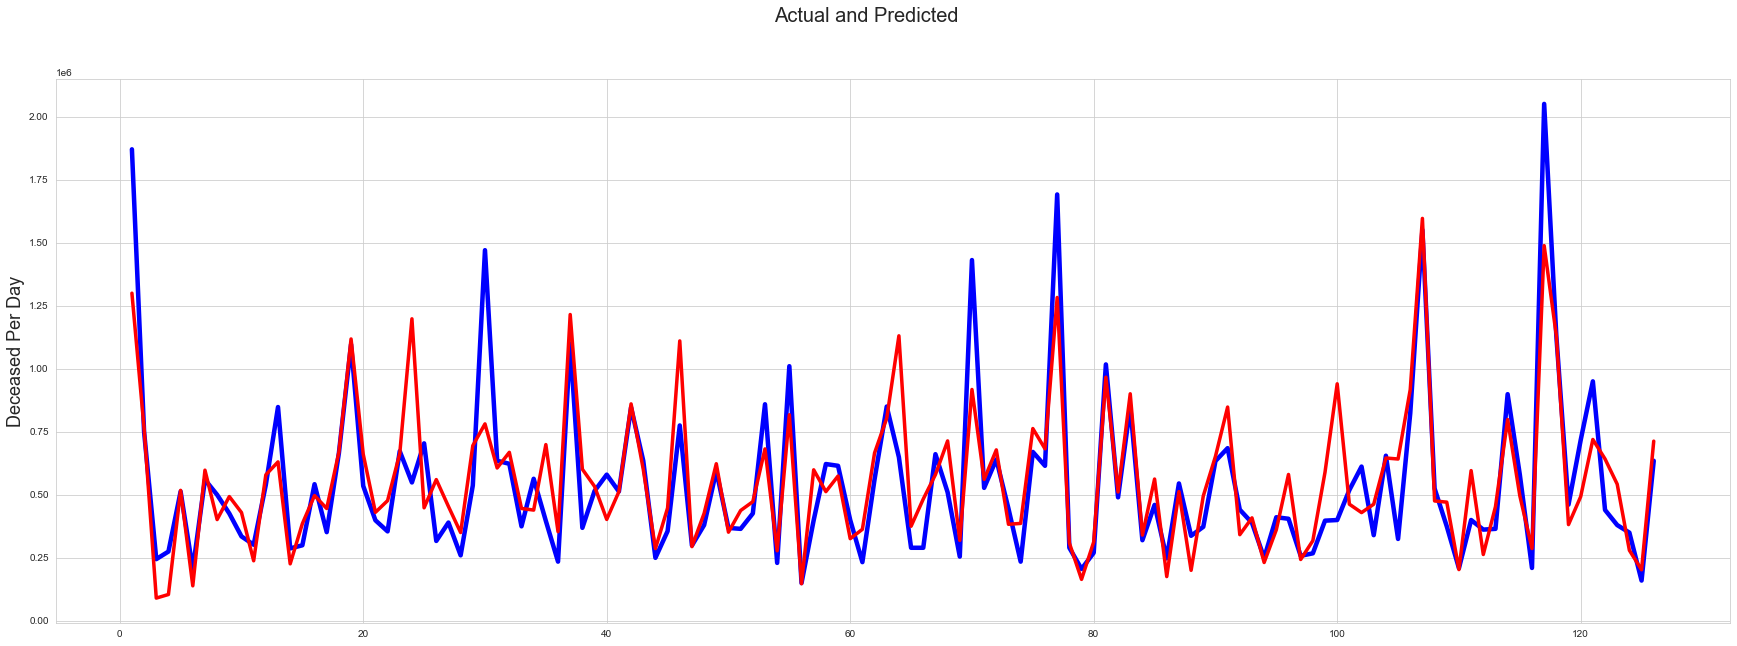

In [73]:
c = [i for i in range(1,127,1)]
fig = plt.figure(figsize = (30,10))
plt.plot(c,y_test[1:127], color = "blue", linewidth = 4.5, linestyle = "-")
plt.plot(c,LR_pred[1:127], color = "red",  linewidth = 3.5, linestyle = "-")
fig.suptitle('Actual and Predicted', fontsize = 20)               
plt.ylabel('Deceased Per Day', fontsize = 18)

In [74]:
LR_accuracy = round(model.score(x_train,y_train)*100)
print('Linear Regression Accuracy :', LR_accuracy)

Linear Regression Accuracy : 70


In [75]:
r_square = metrics.r2_score(y_test,LR_pred)
mean_square = metrics.mean_squared_error(y_test,LR_pred)
r_mean_squared_error = np.sqrt(mean_square)
n = x_test.shape[0]
k = x_test.shape[1]
Adj_r2 = 1 - ((n-1)/(n-k-1))*(1 - r_square)

print("Mean Square Error      :", mean_square)
print('Mean Absolute Error    :', metrics.mean_absolute_error(y_test, LR_pred))
print("Root Mean Square Error :", r_mean_squared_error)
print("R Square               :", r_square*100)
print("Adjusted R Square      :", Adj_r2*100)

Mean Square Error      : 39962516691.06701
Mean Absolute Error    : 124391.98933264466
Root Mean Square Error : 199906.2697642748
R Square               : 70.18653761002477
Adjusted R Square      : 70.11277614439317


## Regularized Linear Regression
### Ridge Regression

In [76]:
print ("RIDGE REGRESSION")
print ("\n")
ridge_model = Ridge(alpha = 0.03, normalize = True)
ridge_model.fit(x_train,y_train)
predictions = ridge_model.predict(x_test)

from sklearn import metrics
mean_square = metrics.mean_squared_error(y_test,predictions)
Adj_r2 = 1 - ((n-1)/(n-k-1))*(1 - r_square)

print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, predictions))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, predictions))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Linear Regression Accuracy    :', round(model.score(x_train,y_train)*100))
print("R Square                      :", metrics.r2_score(y_test, predictions)*100)
print("Adjusted R Square             :", (1 - ((n-1)/(n-k-1))*(1 - metrics.r2_score(y_test, predictions)))*100)

RIDGE REGRESSION


Mean Square Error (MSE)       : 40104419119.003685
Mean Absolute Error           : 123616.87758798749
Root mean Square Error (RMSE) : 200260.8776546325
Linear Regression Accuracy    : 70
R Square                      : 70.08067333898695
Adjusted R Square             : 70.00664995463931


In [77]:
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(ridge_model.coef_[0] , columns = ['coefficients'])], axis = 1)
coefficients

,0,coefficients
0,bedrooms,-29537.456436
1,bathrooms,39060.533065
2,sqft_living,84.016368
3,floors,12763.567011
4,waterfront,525425.678936
5,view,54682.944336
6,condition,27298.622857
7,grade,90436.316080
8,sqft_above,86.032043
9,sqft_basement,60.806026


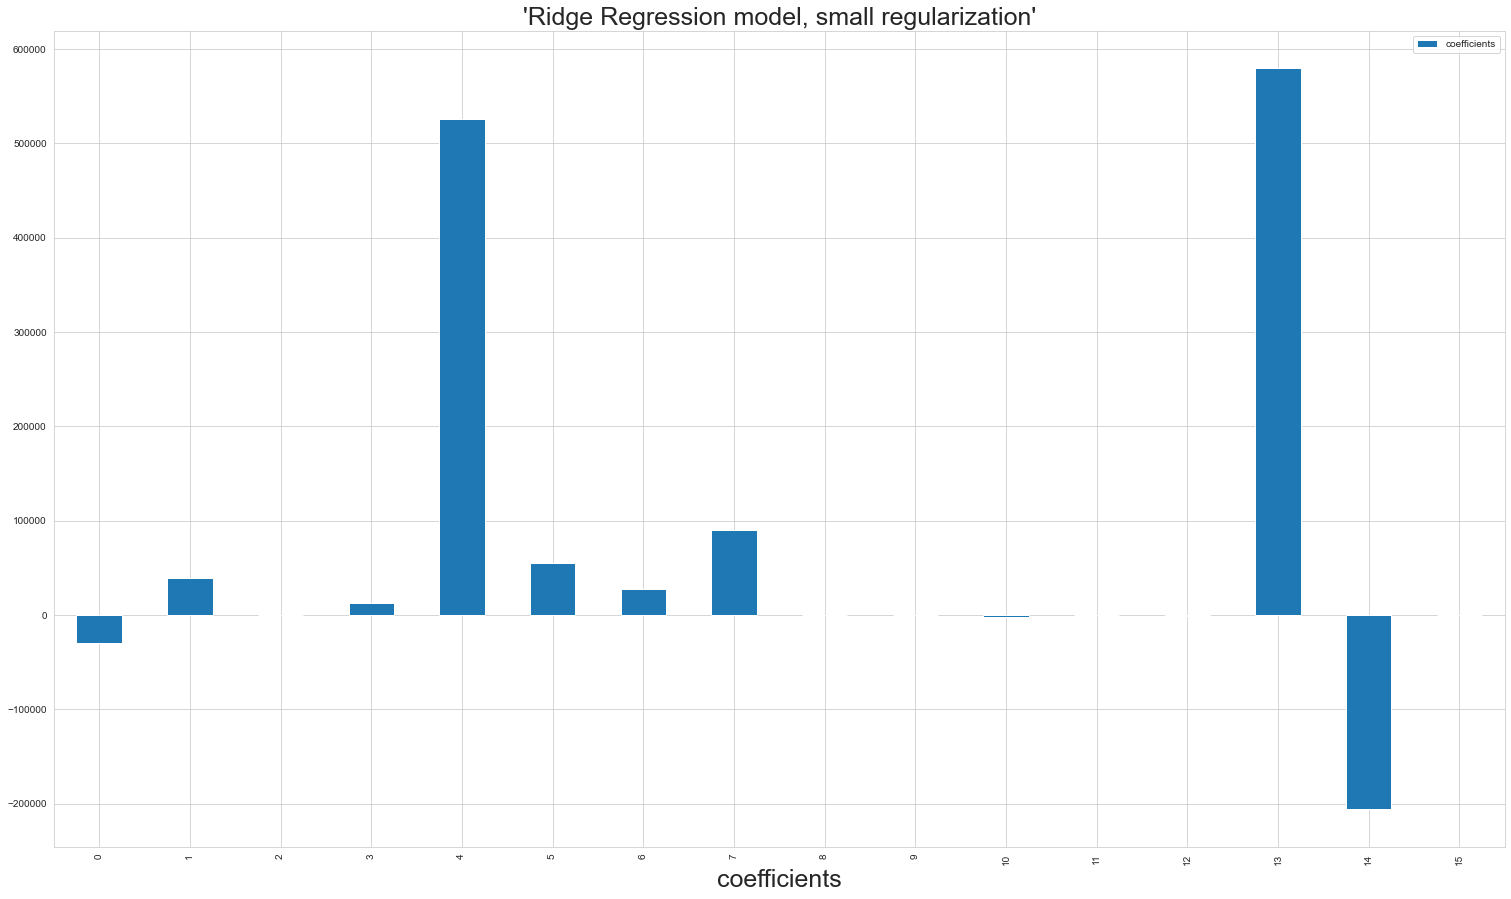

In [78]:
coefficients.sort_values('coefficients', ascending = False, inplace = True)
coefficients.plot(kind = 'bar', figsize = (26,15))
plt.xlabel("coefficients", size = '25')
plt.title("'Ridge Regression model, small regularization'", size = '25')
plt.legend()

### Lasso Regression

In [79]:
print ("LASSO REGRESSION")
lasso_model = Lasso(alpha = 0.003, normalize = True)
lasso_model.fit(x_train,y_train)
predictions = lasso_model.predict(x_test)

mean_square = metrics.mean_squared_error(y_test,predictions)

print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test,predictions))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, predictions))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R Square                      :", metrics.r2_score(y_test, predictions)*100)
print("Adjusted R Square             :", (1 - ((n-1)/(n-k-1))*(1 - metrics.r2_score(y_test, predictions)))*100)

LASSO REGRESSION
Mean Square Error (MSE)       : 39962506256.026825
Mean Absolute Error           : 124391.9606555419
Root mean Square Error (RMSE) : 199906.24366444093
R Square                      : 70.18654539493683
Adjusted R Square             : 70.11278394856586


In [80]:
coefficients = pd.DataFrame(lasso_model.coef_,x_train.columns,columns=['coefficients'])
coefficients

,coefficients
bedrooms,-32630.986132
bathrooms,39809.556150
sqft_living,277.102405
floors,11611.564598
waterfront,536695.255025
view,54590.402188
condition,26184.043289
grade,95442.850128
sqft_above,-102.164227
sqft_basement,-130.371194


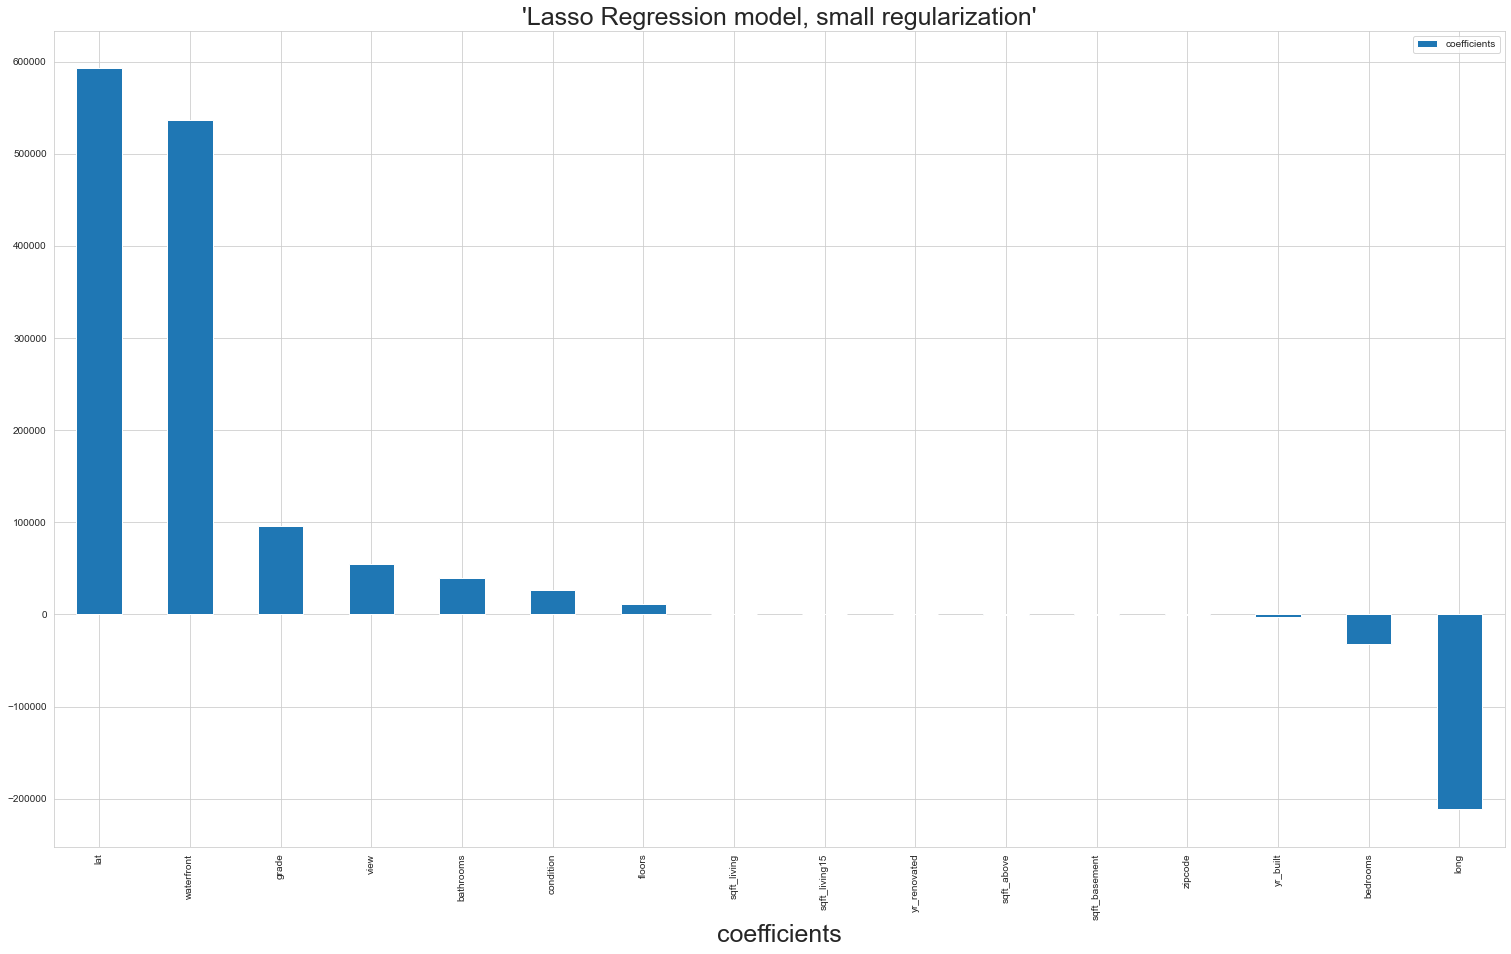

In [81]:
coefficients.sort_values('coefficients', ascending=False, inplace=True)
coefficients.plot(kind = 'bar', figsize=(26,15))
plt.xlabel("coefficients", size = '25')
plt.title("'Lasso Regression model, small regularization'", size = '25')
plt.legend()

## Decision Tree Regression

In [82]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_predict_DT = DT.predict(x_test)

print("Accuracy                      :", metrics.accuracy_score(y_test, y_predict_DT))
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_predict_DT))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, y_predict_DT))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_predict_DT)))
print("R Square                      :", metrics.r2_score(y_test, y_predict_DT)*100)
print("Adjusted R Square             :", (1 - ((n-1)/(n-k-1))*(1 - metrics.r2_score(y_test, y_predict_DT)))*100)

Accuracy                      : 0.00863664404688464
Mean Square Error (MSE)       : 42138319849.694786
Mean Absolute Error           : 113301.60256014805
Root mean Square Error (RMSE) : 205276.20380768637
R Square                      : 68.56331087134845
Adjusted R Square             : 68.4855333816224


## Random Forest Regression

In [83]:
RF = RandomForestRegressor(n_estimators = 600, max_depth = 6, min_samples_leaf = 120, n_jobs = 5)
RF.fit(x_train,y_train)
RF.pred = RF.predict(x_test)
RF.pred

array([ 435964.82587806, 1864922.74056564,  820649.88722206, ...,
        231312.49260986,  306526.80360604,  320905.01866245])

In [84]:
mean_square = metrics.mean_squared_error(y_test, RF.pred)

print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, RF.pred))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, RF.pred))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, RF.pred)))
print("R Square                      :", metrics.r2_score(y_test, RF.pred)*100)
print("Adjusted R Square             :", (1 - ((n-1)/(n-k-1))*(1 - metrics.r2_score(y_test, RF.pred)))*100)

Mean Square Error (MSE)       : 37139936464.11829
Mean Absolute Error           : 100560.23404770774
Root mean Square Error (RMSE) : 192717.2448540044
R Square                      : 72.29228310371721
Adjusted R Square             : 72.22373146148115


## KNN

In [85]:
model = KNeighborsClassifier(n_neighbors = 25)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print(predicted)

[320000. 540000. 490000. ... 210000. 198000. 121800.]


In [86]:
print("Accuracy                      :",metrics.accuracy_score(y_test, predicted))
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, predicted))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, predicted))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("R Square                      :", metrics.r2_score(y_test, predicted)*100)
print("Adjusted R Square             :", (1 - ((n-1)/(n-k-1))*(1 - metrics.r2_score(y_test, predicted)))*100)

Accuracy                      : 0.006323257248611968
Mean Square Error (MSE)       : 122169507490.9724
Mean Absolute Error           : 226743.18214065392
Root mean Square Error (RMSE) : 349527.5489728562
R Square                      : 8.85719122894778
Adjusted R Square             : 8.631694872006879


## Polynomial Regression

In [87]:
poly = PolynomialFeatures(degree = 2, include_bias = False)

X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.fit_transform(x_test)
print(X_train_poly.shape)

poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_train_poly, y_train)
y_predict_poly = poly_lin_reg.predict(X_test_poly)
print(y_predict_poly)

(15129, 152)
[[ 418095.26305771]
 [1762045.04189682]
 [ 669683.30202484]
 ...
 [ 341974.85540009]
 [ 254621.95298004]
 [ 336981.90771103]]


In [88]:
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_predict_poly))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, y_predict_poly))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_predict_poly)))
print("R Square                      :", metrics.r2_score(y_test, y_predict_poly)*100)
print("Adjusted R Square             :", (1 - ((n-1)/(n-k-1))*(1 - metrics.r2_score(y_test, y_predict_poly)))*100)

Mean Square Error (MSE)       : 24871186063.08787
Mean Absolute Error           : 100756.46735456151
Root mean Square Error (RMSE) : 157706.0114995236
R Square                      : 81.44520836817827
Adjusted R Square             : 81.39930197168698


## XGBoost

In [89]:
gbm = GradientBoostingRegressor(max_depth = 2)
gbm.fit(x_train, y_train)
gbm_pred = gbm.predict(x_test)

In [90]:
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, gbm_pred))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, gbm_pred))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, gbm_pred)))
print("R Square                      :", metrics.r2_score(y_test, gbm_pred)*100)
print("Adjusted R Square             :", (1 - ((n-1)/(n-k-1))*(1 - metrics.r2_score(y_test, gbm_pred)))*100)

Mean Square Error (MSE)       : 21652038039.348457
Mean Absolute Error           : 87793.5600818722
Root mean Square Error (RMSE) : 147146.31507227238
R Square                      : 83.8468075786447
Adjusted R Square             : 83.80684297701463


In [91]:
kfold = KFold(n_splits = 2)
results = cross_val_score(gbm, x_train, y_train, cv = kfold)
print("Accuracy          : " , results.mean()*100)
print("standard deviation: " , results.std()*100)      

Accuracy          :  82.52936658991167
standard deviation:  0.6109318841623468


## Observations :

   
   1. Linear Regression :

* Mean Square Error (MSE)      : 39962516691.06701
* Mean Absolute Error (MAE)    : 124391.98933264466
* Root Mean Square Error (RMSE): 199906.2697642748
* R Square                     : 70.18%
* Adjusted R Square            : 70.11%



  2. Ridge Regression :
* Mean Square Error (MSE)       : 40104419119.003685
* Mean Absolute Error (MAE)     : 123616.87758798749
* Root mean Square Error (RMSE) : 200260.8776546325
* R Square                      : 70.08%
* Adjusted R Square             : 70.00%


  3. Lasso Regression :
* Mean Square Error (MSE)       : 39962506256.026825
* Mean Absolute Error (MAE)     : 124391.9606555419
* Root mean Square Error (RMSE) : 199906.24366444093
* R Square                      : 70.18%
* Adjusted R Square             : 70.11%


  4. Decision Tree Regression :
* Accuracy                      : 0.00863664404688464
* Mean Square Error (MSE)       : 42138319849.694786
* Mean Absolute Error (MAE)     : 113301.60256014805
* Root mean Square Error (RMSE) : 205276.20380768637
* R Square                      : 68.56%
* Adjusted R Square             : 68.48%


  5. Random Forest Regression :
* Mean Square Error (MSE)       : 37139936464.11829
* Mean Absolute Error (MAE)     : 100560.23404770774
* Root mean Square Error (RMSE) : 192717.2448540044
* R Square                      : 72.29%
* Adjusted R Square             : 72.22%


  6. Polynomial Regression :
* Mean Square Error (MSE)       : 24871186063.08787
* Mean Absolute Error (MAE)     : 100756.46735456151
* Root mean Square Error (RMSE) : 157706.0114995236
* R Square                      : 81.44%
* Adjusted R Square             : 81.39%


  7. XGBoost :
* Mean Square Error (MSE)       : 21652038039.348457
* Mean Absolute Error (MAE)     : 87793.5600818722
* Root mean Square Error (RMSE) : 147146.31507227238
* R Square                      : 83.84%
* Adjusted R Square             : 83.80%
* Accuracy                      : 82.52%
* standard deviation            : 0.6109318841623468

## Conclusion :

* XGBoost Model have High Accuracy and high R square with low error.
* When we look at the Observations, 2nd degree Polynomial Regression (all features, no preprocessing) is the Second best. 
* However, I have doubts about its reliability. 

